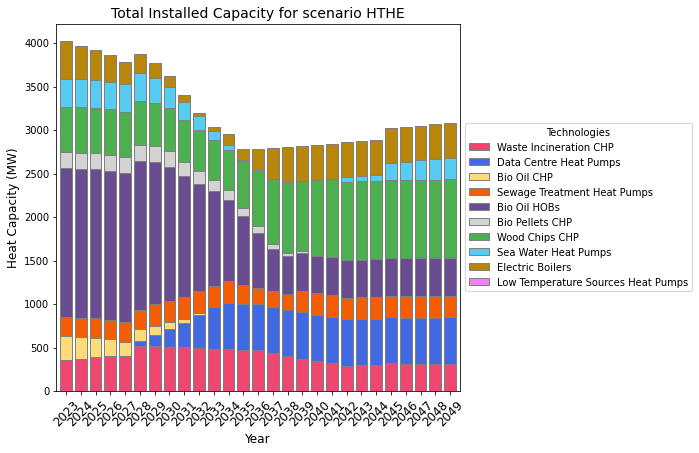

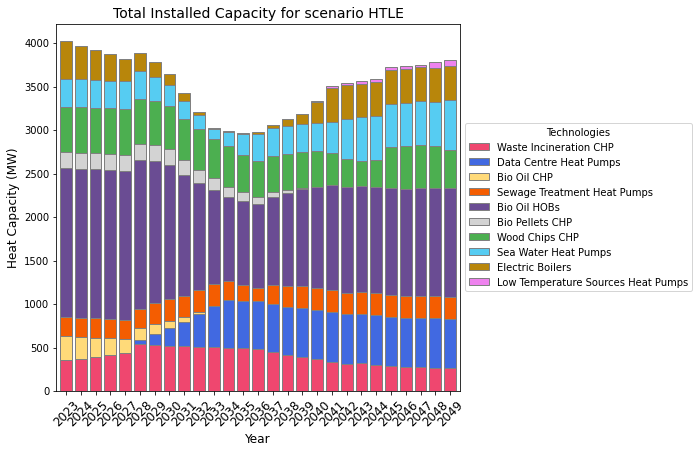

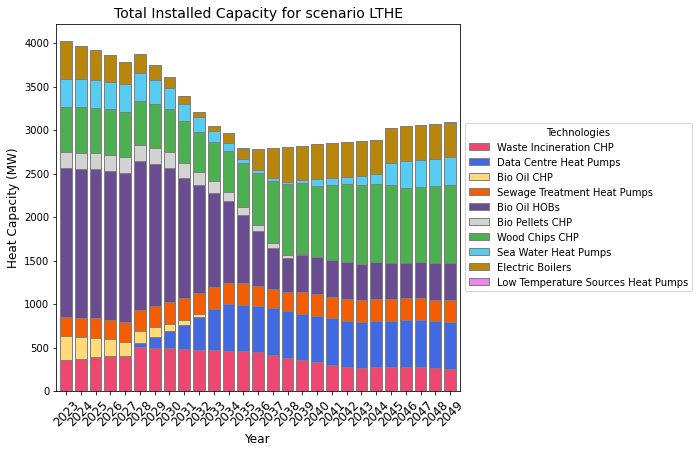

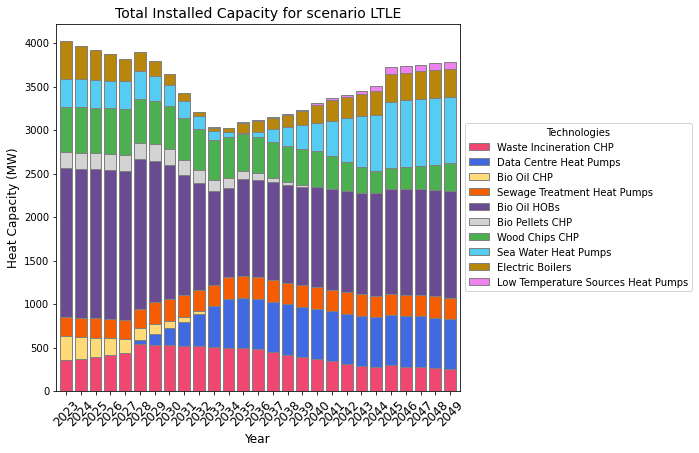

In [2]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
directory_path = r'C:\Users\skpk\OneDrive - KTH\OSeMOSYS_PULP_Short\SRC\Results\Total capacity ann'
# List all files in the directory
file_names = [file for file in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, file))]

for i in file_names:
    if '.xlsx' in i and'CapacityAnn' in i:
        # Load the data
        PBTA = pd.read_excel(i)
        j = re.sub('totCapacityAnn_', '', i, flags=re.IGNORECASE)
        j = re.sub('.xlsx', '', j, flags=re.IGNORECASE)
        # Define technology names
        Names = {
            'Waste Incineration CHP': ['BristaB2', 'HgldP3468', 'LSVTACHP'],
            'Data Centre Heat Pumps': ['DCACC'],
            'Bio Oil CHP': ['KVV1'],
            'Sewage Treatment Heat Pumps': ['HmrbySEWHP'],
            'Bio Oil HOBs': ['DECFOHOB', 'CSBOHOB'],
            'Bio Pellets CHP': ['HslbyP1toP3'],
            'Wood Chips CHP': ['BristaB1', 'KVV8'],
            'Sea Water Heat Pumps': ['VVNHP'],
            'Electric Boilers': ['VVHVELHOB'],
            'Low Temperature Sources Heat Pumps': ['SUPACC'],
            'Year': ['Year']
        }

        technology_colors5 = {
            'Electric Boilers': '#B8860B',          # Coral Red
            'Data Centre Heat Pumps': '#4169E1',    # Turquoise
            'Bio Oil CHP': '#FFDA79',               # Bright Yellow
            'Bio Oil HOBs': '#6A4C93',              # Vivid Purple
            'Bio Pellets CHP': '#D3D3D3',           # Peach Orange
            'Sea Water Heat Pumps': '#56CCF2',      # Bright Sky Blue
            'Sewage Treatment Heat Pumps': '#F45D01', # Bright Orange
            'Low Temperature Sources Heat Pumps': '#EE82EE',  # Pale Green
            'Waste Incineration CHP': '#EF476F',    # Pinkish Red
            'Wood Chips CHP': '#4CAF50'             # Bright Mint Green
        }

        desired_order = sources = [
            "Waste Incineration CHP",
            "Electric Boilers",
            "Sea Water Heat Pumps",
            "Bio Pellets CHP",
            "Wood Chips CHP",
            "Bio Oil HOBs",
            "Bio Oil CHP",
            "Data Centre Heat Pumps",
            "Sewage Treatment Heat Pumps",
            "Low Temperature Sources Heat Pumps",
            'Year'
        ]


       # Filter and pivot the data
        PBTA = PBTA.loc[PBTA['TECHNOLOGY'].isin([item for sublist in Names.values() for item in sublist])]
        pivot_PBTA = PBTA.pivot_table(values='VALUE', index='YEAR', columns='TECHNOLOGY', aggfunc='sum')
        pivot_PBTA.index.name = None
        pivot_PBTA_reset = pivot_PBTA.reset_index()
        pivot_PBTA_reset.rename(columns={'index': 'Year'}, inplace=True)

        # Group the data
        grouped_data = {}
        for category, columns in Names.items():
            grouped_data[category] = pivot_PBTA_reset[columns].sum(axis=1)
        grouped_df = pd.DataFrame(grouped_data)
        grouped_df_new = grouped_df.loc[grouped_df['Year'].isin([2023, 2030, 2035, 2040, 2045, 2049])]
        grouped_df_new = grouped_df_new.reindex(columns=desired_order)
        grouped_df_new_transpose = grouped_df_new.transpose()
        grouped_df_new_transpose
        grouped_df_new_transpose
        grouped_df_new_transpose.index = grouped_df_new_transpose.index.astype(str)  # Convert index to string type if needed
        grouped_df_new_transpose.index = grouped_df_new_transpose.index[:-1].tolist() + ["name"]
        grouped_df_new_transpose.columns = grouped_df_new_transpose.iloc[-1]
        # Drop the last row and reset the index
        grouped_df_new_transpose = grouped_df_new_transpose.drop(grouped_df_new_transpose.index[-1])
        grouped_df_new_transpose.to_excel(f'Total Installed Capacity_{j}.xlsx')

        # Plot settings
        # Set up the plot with a larger size
        fig, ax = plt.subplots(figsize=(8, 6))  # Adjusted figure size

        # Create stacked bar chart
        grouped_df.set_index('Year').plot(kind='bar', stacked=True, color=technology_colors5, edgecolor='grey', width=0.8, ax=ax)

        # Add labels and title
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Heat Capacity (MW)', fontsize=12)
        plt.title(f'Total Installed Capacity for scenario {j}', fontsize=14)

        # Filter legend to only show technologies present in the plot
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1.0, 0.5), title='Technologies', ncol=1, fontsize=10)

        # Set the font size for ticks
        plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better visibility
        plt.yticks(fontsize=10)

        # Adjust layout to prevent overlap and make it spacious
        plt.subplots_adjust(left=0.1, right=0.8, top=0.95, bottom=0.1)  # Adjust margins as needed

        # Save fig
        plt.savefig(f'Total Installed Capacity_{j}.png', format='png', dpi=800, bbox_inches='tight')

        # Show plot
        plt.show()

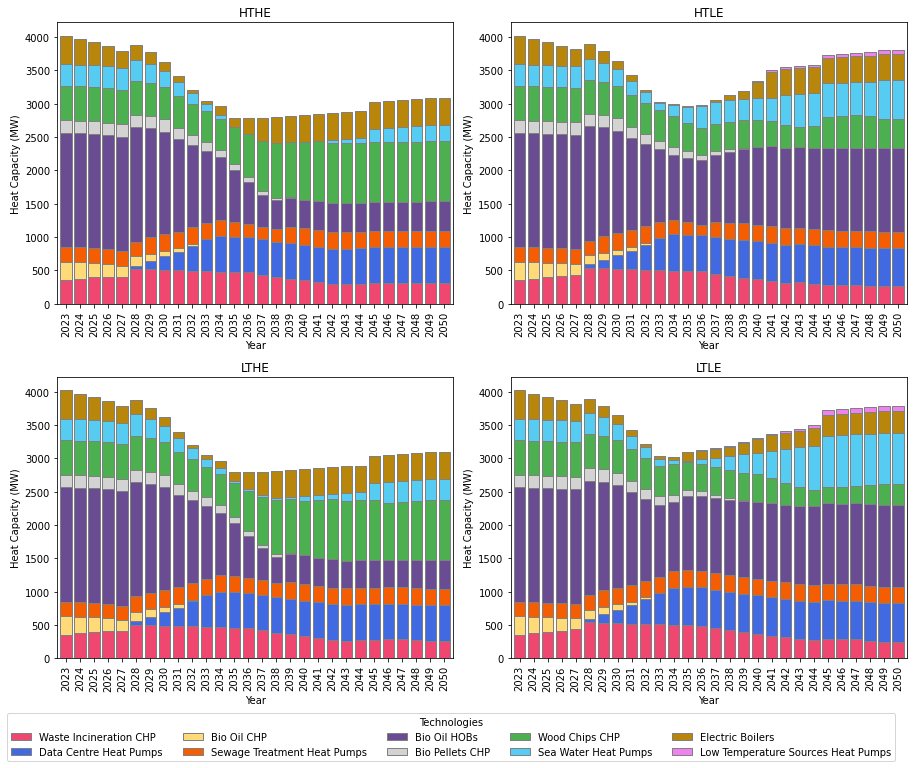

In [19]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

# Directory containing Excel files
directory_path = r'C:\Users\skpk\OneDrive - KTH\OSeMOSYS_PULP_Short\SRC\Results\Total capacity ann'
file_names = [file for file in os.listdir(directory_path) if file.endswith('.xlsx') and 'CapacityAnn' in file]

# Define technology names and colors
Names = {
    'Waste Incineration CHP': ['BristaB2', 'HgldP3468', 'LSVTACHP'],
    'Data Centre Heat Pumps': ['DCACC'],
    'Bio Oil CHP': ['KVV1'],
    'Sewage Treatment Heat Pumps': ['HmrbySEWHP'],
    'Bio Oil HOBs': ['DECFOHOB', 'CSBOHOB'],
    'Bio Pellets CHP': ['HslbyP1toP3'],
    'Wood Chips CHP': ['BristaB1', 'KVV8'],
    'Sea Water Heat Pumps': ['VVNHP'],
    'Electric Boilers': ['VVHVELHOB'],
    'Low Temperature Sources Heat Pumps': ['SUPACC']
}

technology_colors5 = {
    'Electric Boilers': '#B8860B',
    'Data Centre Heat Pumps': '#4169E1',
    'Bio Oil CHP': '#FFDA79',
    'Bio Oil HOBs': '#6A4C93',
    'Bio Pellets CHP': '#D3D3D3',
    'Sea Water Heat Pumps': '#56CCF2',
    'Sewage Treatment Heat Pumps': '#F45D01',
    'Low Temperature Sources Heat Pumps': '#EE82EE',
    'Waste Incineration CHP': '#EF476F',
    'Wood Chips CHP': '#4CAF50'
}

# Set up a 2x2 grid for subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

# Iterate over the first four Excel files and plot each on a subplot
for idx, file_name in enumerate(file_names[:4]):
    # Load and process data
    PBTA = pd.read_excel(os.path.join(directory_path, file_name))
    scenario_name = re.sub('totCapacityAnn_', '', file_name, flags=re.IGNORECASE).replace('.xlsx', '')

    # Filter, pivot, and group the data
    PBTA = PBTA[PBTA['TECHNOLOGY'].isin([item for sublist in Names.values() for item in sublist])]
    pivot_PBTA = PBTA.pivot_table(values='VALUE', index='YEAR', columns='TECHNOLOGY', aggfunc='sum').reset_index()

    # Aggregate data based on technology categories
    grouped_data = {}
    for category, columns in Names.items():
        available_columns = [col for col in columns if col in pivot_PBTA.columns]
        if available_columns:
            grouped_data[category] = pivot_PBTA[available_columns].sum(axis=1)
    grouped_df = pd.DataFrame(grouped_data)
    grouped_df['Year'] = pivot_PBTA['YEAR']
    new_row = grouped_df.iloc[-1] * 1.0001
    new_row['Year'] = grouped_df.iloc[-1]['Year'] + 1

    # Append the new row to the DataFrame
    grouped_df = grouped_df.append(new_row, ignore_index=True)
    grouped_df['Year'] = grouped_df['Year'].fillna(0).astype(int)

    # Plot each grouped DataFrame in the 2x2 grid
    ax = axs[idx]
    grouped_df.set_index('Year').plot(kind='bar', stacked=True, color=technology_colors5, edgecolor='grey', width=0.8, ax=ax)
    ax.set_title(f'{scenario_name}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Heat Capacity (MW)')
    ax.legend().remove()  # Remove individual legends for each plot

# Create a single legend for the whole figure
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', title='Technologies', ncol=5, fontsize=10, bbox_to_anchor=(0.418, -0.07))

# Adjust layout and save the figure with bbox_inches='tight'
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to provide space for the legend
plt.savefig('Combined_Total_Installed_Capacity.png', format='png', dpi=800, bbox_inches='tight')
plt.show()



In [20]:
grouped_df

,Waste Incineration CHP,Data Centre Heat Pumps,Bio Oil CHP,Sewage Treatment Heat Pumps,Bio Oil HOBs,Bio Pellets CHP,Wood Chips CHP,Sea Water Heat Pumps,Electric Boilers,Low Temperature Sources Heat Pumps,Year
0,354.000000,0.000000,275.0,220.000000,1714.000000,185.0,522.000000,320.000000,430.000000,0.000000,2023
1,374.000000,0.000000,248.0,220.000000,1714.000000,185.0,522.000000,320.000000,387.000000,0.000000,2024
2,394.000000,0.000000,220.0,220.000000,1714.000000,185.0,522.000000,320.000000,344.000000,0.000000,2025
3,414.000000,0.000000,193.0,220.000000,1714.000000,185.0,522.000000,320.000000,301.000000,0.000000,2026
4,434.000000,0.000000,165.0,220.000000,1714.000000,185.0,522.000000,320.000000,258.000000,0.000000,2027
5,540.670703,50.000000,138.0,220.000000,1714.000000,185.0,511.000000,320.000000,215.000000,0.000000,2028
6,533.670703,125.000000,110.0,250.000000,1631.000000,185.0,500.000000,282.000000,172.000000,0.000000,2029
7,526.670703,200.000000,83.0,250.000000,1540.000000,185.0,490.000000,243.000000,129.000000,0.000000,2030
8,520.670703,275.000000,55.0,248.338464,1389.000000,167.0,479.000000,205.000000,86.000000,0.000000,2031
9,513.670703,375.000000,28.0,240.656604,1237.000000,148.0,468.000000,156.000000,43.000000,0.000000,2032


In [15]:
# Create a single legend for the whole figure
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', title='Technologies', ncol=5, fontsize=10, bbox_to_anchor=(0.45, -0.08))

# Adjust layout and save the figure with bbox_inches='tight'
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to provide space for the legend
plt.savefig('Combined_Total_Installed_Capacity.png', format='png', dpi=800, bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

In [24]:
grouped_df_new = grouped_df.loc[grouped_df['Year'].isin([2023, 2030, 2035, 2040, 2045, 2049])]
grouped_df_new_transpose = grouped_df_new.transpose()
grouped_df_new_transpose
grouped_df_new_transpose
grouped_df_new_transpose.index = grouped_df_new_transpose.index.astype(str)  # Convert index to string type if needed
grouped_df_new_transpose.index = grouped_df_new_transpose.index[:-1].tolist() + ["name"]
grouped_df_new_transpose.columns = grouped_df_new_transpose.iloc[-1]
grouped_df_new_transpose
# Drop the last row and reset the index
grouped_df_new_transpose = grouped_df_new_transpose.drop(grouped_df_new_transpose.index[-1])
grouped_df_new_transpose.to_excel('test.xlsx')

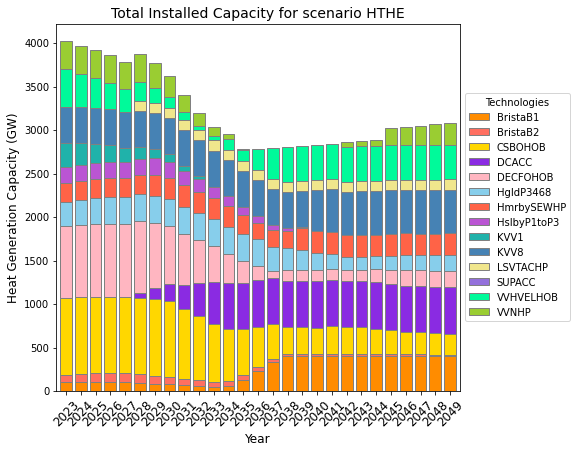

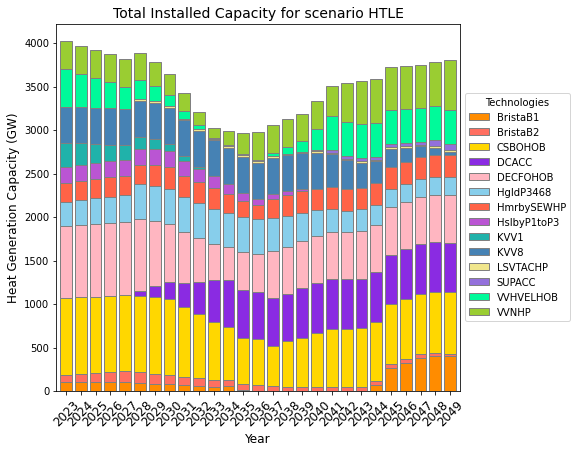

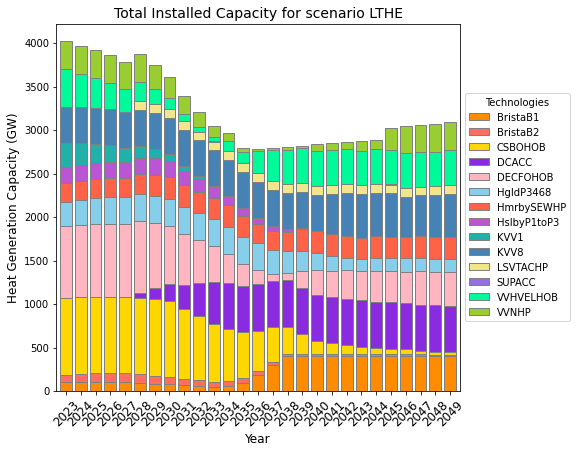

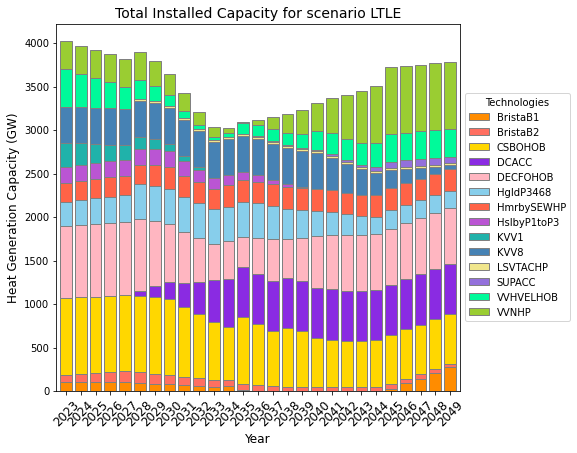

In [4]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
directory_path = r'C:\Users\skpk\OneDrive - KTH\OSeMOSYS_PULP_Short\SRC\Results\Total capacity ann'
# List all files in the directory
file_names = [file for file in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, file))]

for i in file_names:
    if '.xlsx' in i and 'TotCapacityAnn_' in i:
        # Load the data
        PBTA = pd.read_excel(i)
        j = re.sub('TotCapacityAnn_', '', i, flags=re.IGNORECASE)
        j = re.sub('.xlsx', '', j, flags=re.IGNORECASE)
        # Define technology names
        Names = {
            'Waste Incineration CHP': ['BristaB2', 'HgldP3468', 'LSVTACHP'],
            'Data Centre Heat Pumps': ['DCACC'],
            'Bio Oil CHP': ['KVV1'],
            'Bio Oil HOBs': ['DECFOHOB', 'CSBOHOB'],
            'Bio Pellets CHP': ['HslbyP1toP3'],
            'Wood Chips CHP': ['BristaB1', 'KVV8'],
            'Sea Water Heat Pumps': ['VVNHP'],
            'Sewage Treatment Heat Pumps': ['HmrbySEWHP'],
            'Electric Boilers': ['VVHVELHOB'],
            'Low Temperature Sources Heat Pumps': ['SUPACC'],
            'Year': ['Year']
        }

        technology_colors5 = {
            'Electric Boilers': '#B8860B',          # Coral Red
            'Data Centre Heat Pumps': '#4169E1',    # Turquoise
            'Bio Oil CHP': '#FFDA79',               # Bright Yellow
            'Bio Oil HOBs': '#6A4C93',              # Vivid Purple
            'Bio Pellets CHP': '#D3D3D3',           # Peach Orange
            'Sea Water Heat Pumps': '#56CCF2',      # Bright Sky Blue
            'Sewage Treatment Heat Pumps': '#F45D01', # Bright Orange
            'Low Temperature Sources Heat Pumps': '#EE82EE',  # Pale Green
            'Waste Incineration CHP': '#EF476F',    # Pinkish Red
            'Wood Chips CHP': '#4CAF50'             # Bright Mint Green
        }

        technology_colors = {
            'BristaB2': '#FF6F61',         # Light Coral
            'HgldP3468': '#87CEEB',        # Light Sky Blue
            'LSVTACHP': '#F0E68C',         # Khaki Yellow
            'DCACC': '#8A2BE2',            # Blue Violet
            'KVV1': '#20B2AA',             # Light Sea Green
            'DECFOHOB': '#FFB6C1',         # Light Pink
            'CSBOHOB': '#FFD700',          # Gold
            'HslbyP1toP3': '#BA55D3',      # Medium Orchid
            'BristaB1': '#FF8C00',         # Dark Orange
            'KVV8': '#4682B4',             # Steel Blue
            'VVNHP': '#9ACD32',            # Yellow Green
            'HmrbySEWHP': '#FF6347',       # Tomato
            'VVHVELHOB': '#00FA9A',        # Medium Spring Green
            'SUPACC': '#9370DB',           # Medium Purple
            'Year': '#00CED1'              # Dark Turquoise
        }

        techlist = [item for sublist in [Names[newlist] for newlist in Names] for item in sublist]
        
       # Filter and pivot the data
        PBTA = PBTA.loc[PBTA['TECHNOLOGY'].isin([item for sublist in Names.values() for item in sublist])]
        pivot_PBTA = PBTA.pivot_table(values='VALUE', index='YEAR', columns='TECHNOLOGY', aggfunc='sum')
        pivot_PBTA.index.name = None
        grouped_df = pivot_PBTA.reset_index()
        grouped_df.rename(columns={'index': 'Year'}, inplace=True)
        grouped_df.to_excel('Total Installed Capacity_SE_names_{j}.xlsx')

        # Group the data
        # grouped_data = {}
        # for category, columns in Names.items():
        #     grouped_data[category] = pivot_PBTA_reset[columns].sum(axis=1)
        # grouped_df = pd.DataFrame(grouped_data)

        # Plot settings
        # Set up the plot with a larger size
        fig, ax = plt.subplots(figsize=(8, 6))  # Adjusted figure size

        # Create stacked bar chart
        grouped_df.set_index('Year').plot(kind='bar', stacked=True, color=technology_colors, edgecolor='grey', width=0.8, ax=ax)

        # Add labels and title
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Heat Generation Capacity (GW)', fontsize=12)
        plt.title(f'Total Installed Capacity for scenario {j}', fontsize=14)

        # Filter legend to only show technologies present in the plot
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1.0, 0.5), title='Technologies', ncol=1, fontsize=10)

        # Set the font size for ticks
        plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better visibility
        plt.yticks(fontsize=10)

        # Adjust layout to prevent overlap and make it spacious
        plt.subplots_adjust(left=0.1, right=0.8, top=0.95, bottom=0.1)  # Adjust margins as needed

        # Save fig
        plt.savefig(f'Total Installed Capacity_SE_names_{j}.png', format='png', dpi=800, bbox_inches='tight')

        # Show plot
        plt.show()


In [ ]:
i = 'TotCapacityAnn_LTHE.xlsx'
PBTA = pd.read_excel(i)
j = re.sub('TotCapacityAnn_', '', i, flags=re.IGNORECASE)
j = re.sub('.xlsx', '', j, flags=re.IGNORECASE)
# Define technology names
Names = {
    'Waste Incineration CHP': ['BristaB2', 'HgldP3468', 'LSVTACHP'],
    'Data Centre Heat Pumps': ['DCACC'],
    'Bio Oil CHP': ['KVV1'],
    'Bio Oil HOBs': ['DECFOHOB', 'CSBOHOB'],
    'Bio Pellets CHP': ['HslbyP1toP3'],
    'Wood Chips CHP': ['BristaB1', 'KVV8'],
    'Sea Water Heat Pumps': ['VVNHP'],
    'Sewage Treatment Heat Pumps': ['HmrbySEWHP'],
    'Electric Boilers': ['VVHVELHOB'],
    'Low Temperature Sources Heat Pumps': ['SUPACC'],
    'Year': ['Year']
}

technology_colors5 = {
    'Electric Boilers': '#FF0000',          # Coral Red
    'Data Centre Heat Pumps': '#4169E1',    # Turquoise
    'Bio Oil CHP': '#FFDA79',               # Bright Yellow
    'Bio Oil HOBs': '#6A4C93',              # Vivid Purple
    'Bio Pellets CHP': '#D3D3D3',           # Peach Orange
    'Sea Water Heat Pumps': '#56CCF2',      # Bright Sky Blue
    'Sewage Treatment Heat Pumps': '#F45D01', # Bright Orange
    'Low Temperature Sources Heat Pumps': '#EE82EE',  # Pale Green
    'Waste Incineration CHP': '#EF476F',    # Pinkish Red
    'Wood Chips CHP': '#4CAF50'             # Bright Mint Green
}

technology_colors = {
    'BristaB2': '#FF6F61',         # Light Coral
    'HgldP3468': '#87CEEB',        # Light Sky Blue
    'LSVTACHP': '#F0E68C',         # Khaki Yellow
    'DCACC': '#8A2BE2',            # Blue Violet
    'KVV1': '#20B2AA',             # Light Sea Green
    'DECFOHOB': '#FFB6C1',         # Light Pink
    'CSBOHOB': '#FFD700',          # Gold
    'HslbyP1toP3': '#BA55D3',      # Medium Orchid
    'BristaB1': '#FF8C00',         # Dark Orange
    'KVV8': '#4682B4',             # Steel Blue
    'VVNHP': '#9ACD32',            # Yellow Green
    'HmrbySEWHP': '#FF6347',       # Tomato
    'VVHVELHOB': '#00FA9A',        # Medium Spring Green
    'SUPACC': '#9370DB',           # Medium Purple
    'Year': '#00CED1'              # Dark Turquoise
}

techlist = [item for sublist in [Names[newlist] for newlist in Names] for item in sublist]

# Filter and pivot the data
PBTA = PBTA.loc[PBTA['TECHNOLOGY'].isin([item for sublist in Names.values() for item in sublist])]
pivot_PBTA = PBTA.pivot_table(values='VALUE', index='YEAR', columns='TECHNOLOGY', aggfunc='sum')
pivot_PBTA.index.name = None
grouped_df = pivot_PBTA.reset_index()
grouped_df.rename(columns={'index': 'Year'}, inplace=True)

# Group the data
# grouped_data = {}
# for category, columns in Names.items():
#     grouped_data[category] = pivot_PBTA_reset[columns].sum(axis=1)
# grouped_df = pd.DataFrame(grouped_data)

# Plot settings
# Set up the plot with a larger size
fig, ax = plt.subplots(figsize=(8, 6))  # Adjusted figure size

# Create stacked bar chart
grouped_df.set_index('Year').plot(kind='bar', stacked=True, color=technology_colors, edgecolor='grey', width=0.8, ax=ax)
grouped_df

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Heat Capacity (GW)', fontsize=12)
plt.title(f'Total Installed Capacity for scenario {j}', fontsize=14)

# Filter legend to only show technologies present in the plot
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1.0, 0.5), title='Technologies', ncol=1, fontsize=10)

# Set the font size for ticks
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=10)

# Adjust layout to prevent overlap and make it spacious
plt.subplots_adjust(left=0.1, right=0.8, top=0.95, bottom=0.1)  # Adjust margins as needed

# Save fig
plt.savefig(f'Total Installed Capacity_SE_names_new_{j}.png', format='png', dpi=800, bbox_inches='tight')

# Show plot
plt.show()

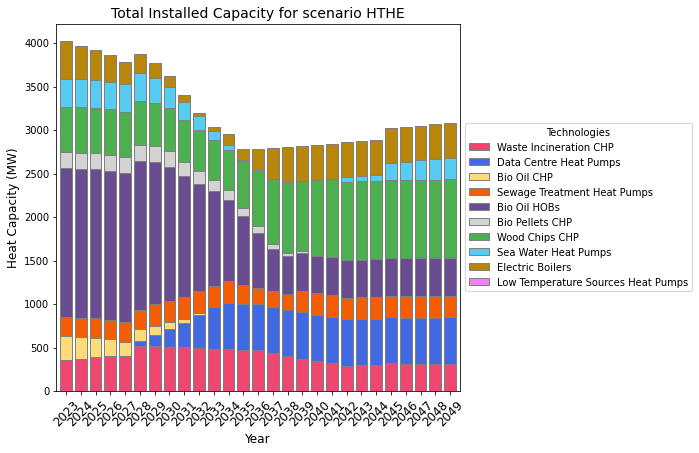

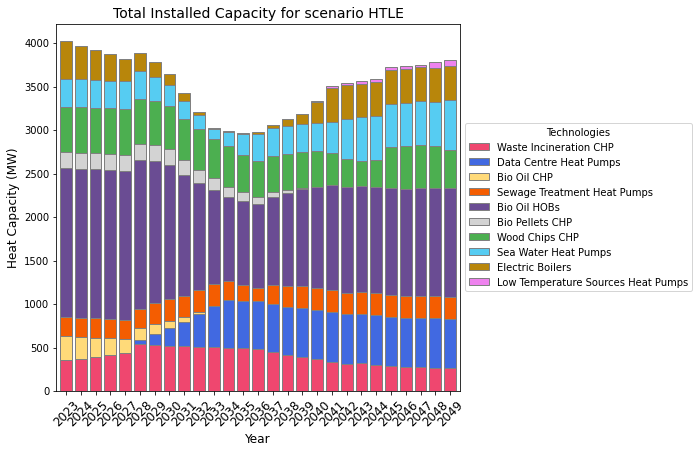

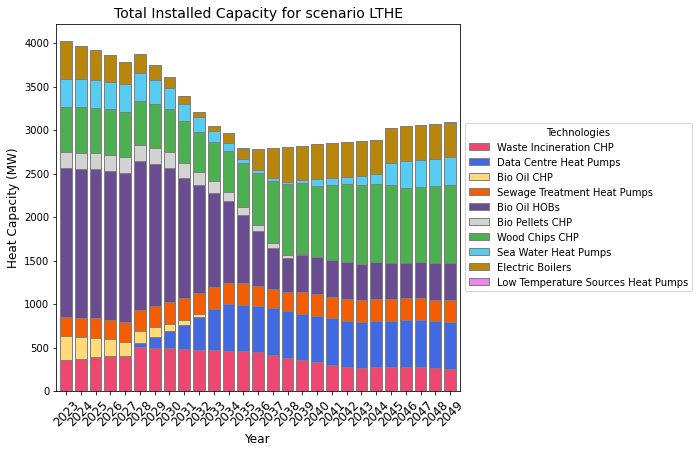

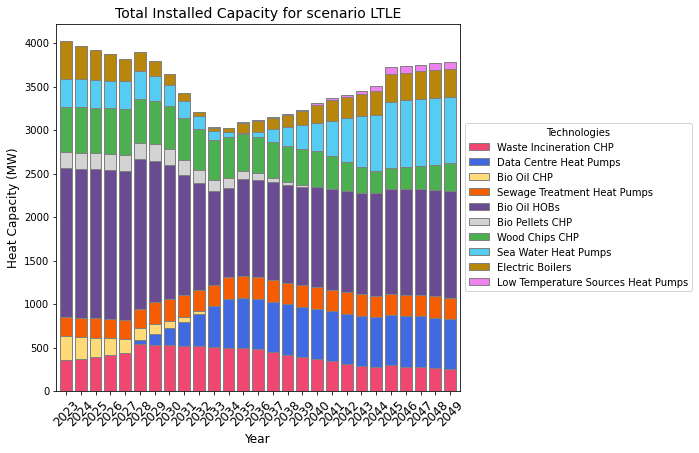

In [6]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
directory_path = r'C:\Users\skpk\OneDrive - KTH\OSeMOSYS_PULP_Short\SRC\Results\Total capacity ann'
# List all files in the directory
file_names = [file for file in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, file))]

for i in file_names:
    if '.xlsx' in i:
        # Load the data
        PBTA = pd.read_excel(i)
        j = re.sub('totCapacityAnn_', '', i, flags=re.IGNORECASE)
        j = re.sub('.xlsx', '', j, flags=re.IGNORECASE)
        # Define technology names
        Names = {
            'Waste Incineration CHP': ['BristaB2', 'HgldP3468', 'LSVTACHP'],
            'Data Centre Heat Pumps': ['DCACC'],
            'Bio Oil CHP': ['KVV1'],
            'Sewage Treatment Heat Pumps': ['HmrbySEWHP'],
            'Bio Oil HOBs': ['DECFOHOB', 'CSBOHOB'],
            'Bio Pellets CHP': ['HslbyP1toP3'],
            'Wood Chips CHP': ['BristaB1', 'KVV8'],
            'Sea Water Heat Pumps': ['VVNHP'],
            'Electric Boilers': ['VVHVELHOB'],
            'Low Temperature Sources Heat Pumps': ['SUPACC'],
            'Year': ['Year']
        }

        technology_colors5 = {
            'Electric Boilers': '#B8860B',          # Coral Red
            'Data Centre Heat Pumps': '#4169E1',    # Turquoise
            'Bio Oil CHP': '#FFDA79',               # Bright Yellow
            'Bio Oil HOBs': '#6A4C93',              # Vivid Purple
            'Bio Pellets CHP': '#D3D3D3',           # Peach Orange
            'Sea Water Heat Pumps': '#56CCF2',      # Bright Sky Blue
            'Sewage Treatment Heat Pumps': '#F45D01', # Bright Orange
            'Low Temperature Sources Heat Pumps': '#EE82EE',  # Pale Green
            'Waste Incineration CHP': '#EF476F',    # Pinkish Red
            'Wood Chips CHP': '#4CAF50'             # Bright Mint Green
        }

       # Filter and pivot the data
        PBTA = PBTA.loc[PBTA['TECHNOLOGY'].isin([item for sublist in Names.values() for item in sublist])]
        pivot_PBTA = PBTA.pivot_table(values='VALUE', index='YEAR', columns='TECHNOLOGY', aggfunc='sum')
        pivot_PBTA.index.name = None
        pivot_PBTA_reset = pivot_PBTA.reset_index()
        pivot_PBTA_reset.rename(columns={'index': 'Year'}, inplace=True)

        # Group the data
        grouped_data = {}
        for category, columns in Names.items():
            grouped_data[category] = pivot_PBTA_reset[columns].sum(axis=1)
        grouped_df = pd.DataFrame(grouped_data)

        # Plot settings
        # Set up the plot with a larger size
        fig, ax = plt.subplots(figsize=(8, 6))  # Adjusted figure size

        # Create stacked bar chart
        grouped_df.set_index('Year').plot(kind='bar', stacked=True, color=technology_colors5, edgecolor='grey', width=0.8, ax=ax)

        # Add labels and title
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Heat Capacity (MW)', fontsize=12)
        plt.title(f'Total Installed Capacity for scenario {j}', fontsize=14)

        # Filter legend to only show technologies present in the plot
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1.0, 0.5), title='Technologies', ncol=1, fontsize=10)

        # Set the font size for ticks
        plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better visibility
        plt.yticks(fontsize=10)

        # Adjust layout to prevent overlap and make it spacious
        plt.subplots_adjust(left=0.1, right=0.8, top=0.95, bottom=0.1)  # Adjust margins as needed

        # Save fig
        plt.savefig(f'Total Installed Capacity_{j}.png', format='png', dpi=800, bbox_inches='tight')

        # Show plot
        plt.show()

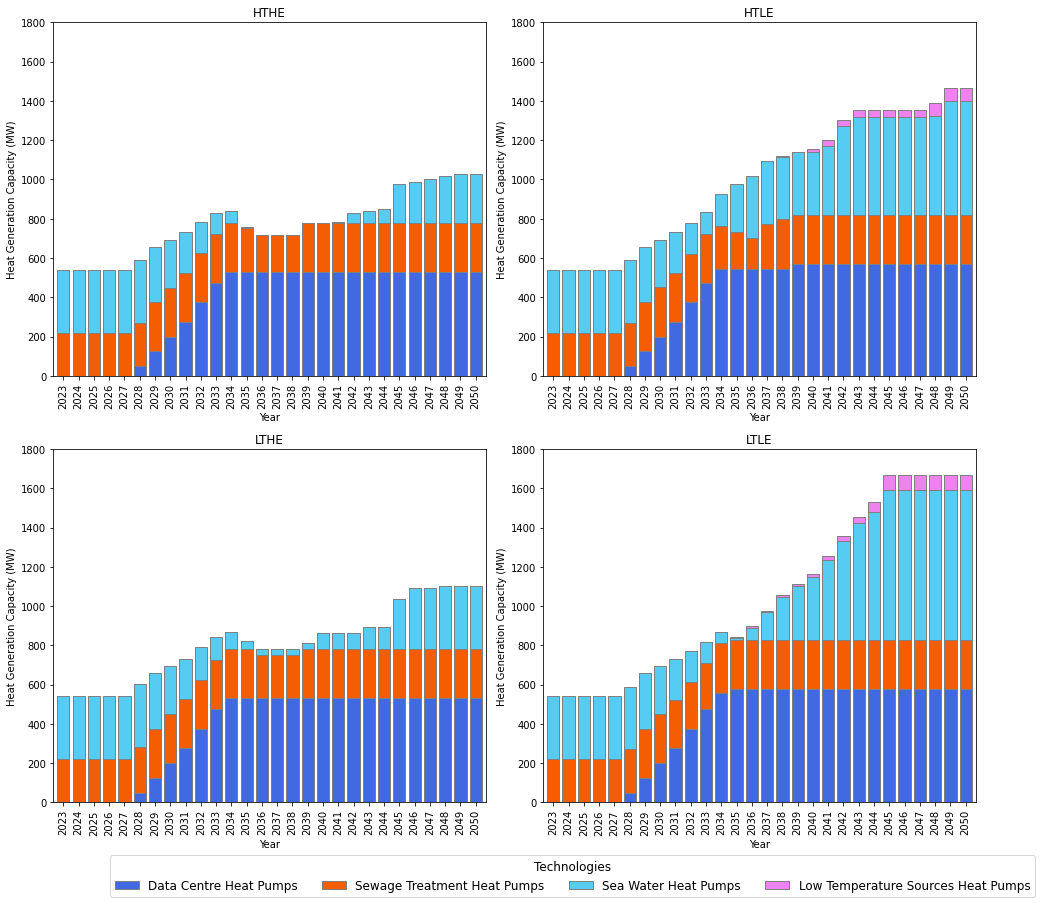

In [5]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

directory_path = r'C:\Users\skpk\OneDrive - KTH\OSeMOSYS_PULP_Short\SRC\Results\Total capacity ann'
file_names = [file for file in os.listdir(directory_path) if file.endswith('.xlsx')]

# Define technology names and colors
Names = {
    'Data Centre Heat Pumps': ['DCACC'],
    'Sewage Treatment Heat Pumps': ['HmrbySEWHP'],
    'Sea Water Heat Pumps': ['VVNHP'],
    'Low Temperature Sources Heat Pumps': ['SUPACC'],
    'Year': ['index']
}

technology_colors5 = {
    'Electric Boilers': '#B8860B',
    'Data Centre Heat Pumps': '#4169E1',
    'Bio Oil CHP': '#FFDA79',
    'Bio Oil HOBs': '#6A4C93',
    'Bio Pellets CHP': '#D3D3D3',
    'Sea Water Heat Pumps': '#56CCF2',
    'Sewage Treatment Heat Pumps': '#F45D01',
    'Low Temperature Sources Heat Pumps': '#EE82EE',
    'Waste Incineration CHP': '#EF476F',
    'Wood Chips CHP': '#4CAF50'
}

# Set up a 2x2 subplot grid with increased figure size
fig, axs = plt.subplots(2, 2, figsize=(16, 12))  # Increased figure size
axs = axs.flatten()

# Loop through files and plot each in a subplot
for idx, i in enumerate(file_names[:4]):  # Limit to 4 files for the 2x2 grid
    # Load and process the data
    PBTA = pd.read_excel(os.path.join(directory_path, i))
    scenario_name = re.sub('TotCapacityAnn_', '', i, flags=re.IGNORECASE)
    scenario_name = re.sub('.xlsx', '', scenario_name, flags=re.IGNORECASE)

    # Filter and pivot the data
    PBTA = PBTA.loc[PBTA['TECHNOLOGY'].isin([item for sublist in Names.values() for item in sublist])]
    pivot_PBTA = PBTA.pivot_table(values='VALUE', index='YEAR', columns='TECHNOLOGY', aggfunc='sum')
    pivot_PBTA.index.name = None
    pivot_PBTA_reset = pivot_PBTA.reset_index()

    # Group data based on technology categories
    grouped_data = {}
    for category, columns in Names.items():
        available_columns = [col for col in columns if col in pivot_PBTA_reset.columns]
        if available_columns:
            grouped_data[category] = pivot_PBTA_reset[available_columns].sum(axis=1)
    grouped_df = pd.DataFrame(grouped_data)
    grouped_df['Year'] = pivot_PBTA_reset['index']
    new_row = grouped_df.iloc[-1] * 1.0001
    new_row['Year'] = grouped_df.iloc[-1]['Year'] + 1

    # Append the new row to the DataFrame
    grouped_df = grouped_df.append(new_row, ignore_index=True)
    grouped_df['Year'] = grouped_df['Year'].fillna(0).astype(int)
    # Plot in the corresponding subplot
    ax = axs[idx]
    grouped_df.set_index('Year').plot(kind='bar', stacked=True, color=technology_colors5, edgecolor='grey', width=0.8, ax=ax)
    
    # Add title and labels
    ax.set_title(f'{scenario_name}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Heat Generation Capacity (MW)')
    ax.set_ylim(0, 1800)  # Set y-axis limits

    # Remove individual legends
    ax.legend().remove()

# Create a single legend for the whole figure, with all unique labels
handles, labels = axs[0].get_legend_handles_labels()
unique_handles_labels = {label: handle for handle, label in zip(handles, labels)}
fig.legend(handles, labels, loc='lower center', ncol=5, title='Technologies', title_fontsize=12, fontsize=12, bbox_to_anchor=(0.5, -0.05))  # Position the legend below the plots

# Adjust layout to make space for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to provide space for the legend
plt.subplots_adjust(right=0.85)  # Adjust right margin to allow more space for the legend
plt.savefig('Combined_Accumulated_Installed_Capacity_UEH.png', format='png', dpi=800, bbox_inches='tight')
plt.show()


In [7]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
PBTA = pd.read_excel('TotCapacityAnn_LTLE.xlsx')

#PBTA = pd.read_csv('TotCapacityAnn_LTLE_no_peak.csv')
# Define technology names
Names = {
    'Waste Incineration CHP': ['BristaB2', 'HgldP3468', 'LSVTACHP'],
    'Data Centre Heat Pumps': ['DCACC'],
    'Bio Oil CHP': ['KVV1'],
    'Sewage Treatment Heat Pumps': ['HmrbySEWHP'],
    'Bio Oil HOBs': ['DECFOHOB', 'CSBOHOB'],
    'Bio Pellets CHP': ['HslbyP1toP3'],
    'Wood Chips CHP': ['BristaB1', 'KVV8'],
    'Sea Water Heat Pumps': ['VVNHP'],
    'Electric Boilers': ['VVHVELHOB'],
    'Low Temperature Sources Heat Pumps': ['SUPACC'],
    'Year': ['Year']
}

technology_colors5 = {
    'Electric Boilers': '#B8860B',          # Coral Red
    'Data Centre Heat Pumps': '#4169E1',    # Turquoise
    'Bio Oil CHP': '#FFDA79',               # Bright Yellow
    'Bio Oil HOBs': '#6A4C93',              # Vivid Purple
    'Bio Pellets CHP': '#D3D3D3',           # Peach Orange
    'Sea Water Heat Pumps': '#56CCF2',      # Bright Sky Blue
    'Sewage Treatment Heat Pumps': '#F45D01', # Bright Orange
    'Low Temperature Sources Heat Pumps': '#EE82EE',  # Pale Green
    'Waste Incineration CHP': '#EF476F',    # Pinkish Red
    'Wood Chips CHP': '#4CAF50'             # Bright Mint Green
}

desired_order = sources = [
    "Waste Incineration CHP",
    "Electric Boilers",
    "Sea Water Heat Pumps",
    "Bio Pellets CHP",
    "Wood Chips CHP",
    "Bio Oil HOBs",
    "Bio Oil CHP",
    "Data Centre Heat Pumps",
    "Sewage Treatment Heat Pumps",
    "Low Temperature Sources Heat Pumps",
    'Year'
]


# Filter and pivot the data
PBTA = PBTA.loc[PBTA['TECHNOLOGY'].isin([item for sublist in Names.values() for item in sublist])]
pivot_PBTA = PBTA.pivot_table(values='VALUE', index='YEAR', columns='TECHNOLOGY', aggfunc='sum')
pivot_PBTA.index.name = None
pivot_PBTA_reset = pivot_PBTA.reset_index()
pivot_PBTA_reset.rename(columns={'index': 'Year'}, inplace=True)

# Group the data
grouped_data = {}
for category, columns in Names.items():
    grouped_data[category] = pivot_PBTA_reset[columns].sum(axis=1)
grouped_df = pd.DataFrame(grouped_data)
grouped_df_new = grouped_df
grouped_df_new = grouped_df_new.reindex(columns=desired_order)
grouped_df_new_transpose = grouped_df_new.transpose()
grouped_df_new_transpose
grouped_df_new_transpose
grouped_df_new_transpose.index = grouped_df_new_transpose.index.astype(str)  # Convert index to string type if needed
grouped_df_new_transpose.index = grouped_df_new_transpose.index[:-1].tolist() + ["name"]
grouped_df_new_transpose.columns = grouped_df_new_transpose.iloc[-1]
# Drop the last row and reset the index
grouped_df_new_transpose = grouped_df_new_transpose.drop(grouped_df_new_transpose.index[-1])
grouped_df_new_transpose.to_excel(f'Total Installed Capacity_LTLE_peak.xlsx')


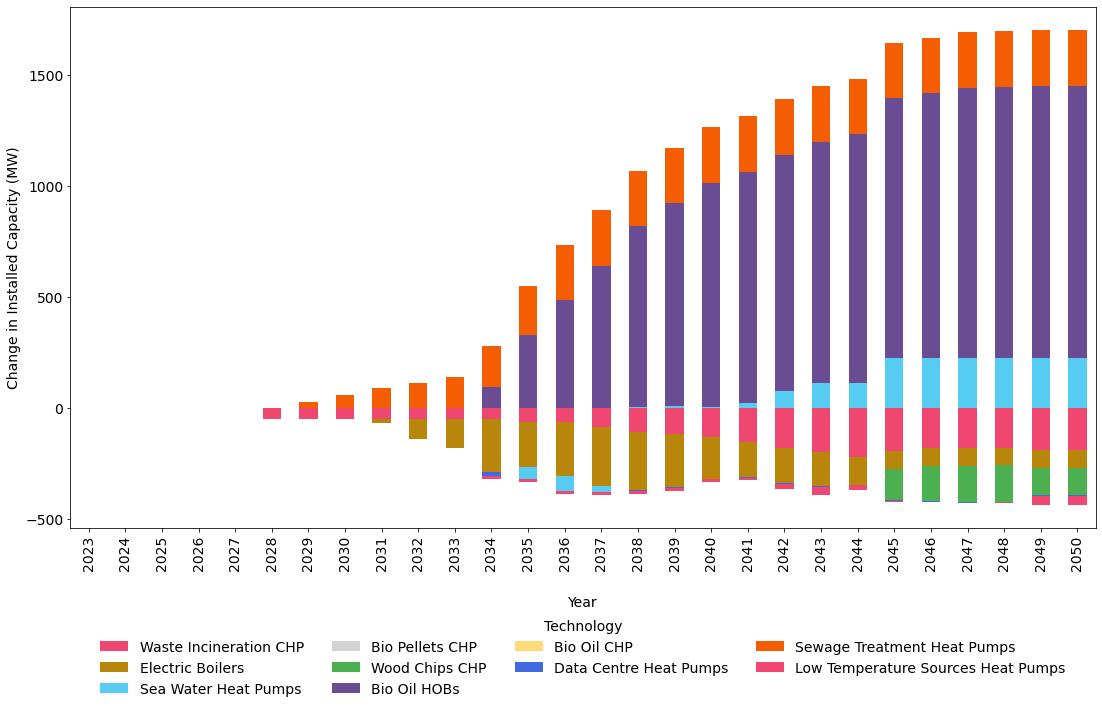

In [37]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
PBTA = pd.read_excel('Total Installed Capacity_LTLE_peak.xlsx', sheet_name='Sheet2')

#PBTA = pd.read_csv('TotCapacityAnn_LTLE_no_peak.csv')
# Define technology names
Names = {
    'Waste Incineration CHP': ['BristaB2', 'HgldP3468', 'LSVTACHP'],
    'Data Centre Heat Pumps': ['DCACC'],
    'Bio Oil CHP': ['KVV1'],
    'Sewage Treatment Heat Pumps': ['HmrbySEWHP'],
    'Bio Oil HOBs': ['DECFOHOB', 'CSBOHOB'],
    'Bio Pellets CHP': ['HslbyP1toP3'],
    'Wood Chips CHP': ['BristaB1', 'KVV8'],
    'Sea Water Heat Pumps': ['VVNHP'],
    'Electric Boilers': ['VVHVELHOB'],
    'Low Temperature Sources Heat Pumps': ['SUPACC'],
    'Year': ['Year']
}

technology_colors5 = {
    'Electric Boilers': '#B8860B',          # Coral Red
    'Data Centre Heat Pumps': '#4169E1',    # Turquoise
    'Bio Oil CHP': '#FFDA79',               # Bright Yellow
    'Bio Oil HOBs': '#6A4C93',              # Vivid Purple
    'Bio Pellets CHP': '#D3D3D3',           # Peach Orange
    'Sea Water Heat Pumps': '#56CCF2',      # Bright Sky Blue
    'Sewage Treatment Heat Pumps': '#F45D01', # Bright Orange
    'Low Temperature Sources Heat Pumps': '#EE82EE',  # Pale Green
    'Waste Incineration CHP': '#EF476F',    # Pinkish Red
    'Wood Chips CHP': '#4CAF50'             # Bright Mint Green
}

PBTA.set_index('Year', inplace=True)

# Create the stacked column chart
# Create the stacked column chart
PBTA.plot(kind='bar', stacked=True, color=[technology_colors5[tech] for tech in PBTA.columns[:-1]], figsize=(16, 10))

# Add labels and title
plt.xlabel('Year',fontsize=14, labelpad=18)
plt.ylabel('Change in Installed Capacity (MW)',fontsize=14)

# Move legend to the bottom and make it horizontal with 6 columns
plt.legend(title='Technology',title_fontsize=14, bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=4, frameon=False, fontsize=14)
# Set x-tick and y-tick label sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()

# Show the plot
plt.show()
